# Práctica 1 Pregunta 3: Clasificación usando 4 características de los datos

Selecciona 4 características de los datos. Usando estas características, implementa los métodos Logistic Regression, SVM y Random Trees para clasificar los datos. Describe en el informe los parámetros usados y los resultados obtenidos con los distintos métodos y deposita el código Python en Aula Virtual en el fichero 'answer3.ipynb'.

## Importación de bibliotecas para análisis de datos y escalado

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Carga del dataset desde un archivo CSV

In [2]:
dataset = pd.read_csv("dataset.csv")

## Anonimización y análisis de la correlación del dataset

In [3]:
dataset_anonymized = dataset.drop(["Target"], axis=1)
dataset_4_characteristics = dataset_anonymized.drop(["Col2", "Col3", "Col4", "Col6", "Col8", "Col9", "Col10"], axis=1)
dataset_4_characteristics.to_csv('dataset_4_characteristics.csv', index=False)
dataset_4_characteristics.corr()

,Col1,Col5,Col7,Col11
Col1,1.000000,-0.260987,-0.202288,-0.552496
Col5,-0.260987,1.000000,0.093595,0.312770
Col7,-0.202288,0.093595,1.000000,0.109903
Col11,-0.552496,0.312770,0.109903,1.000000


## Separación de características y etiquetas del dataset

In [4]:
X = dataset_4_characteristics
y = dataset.get("Target")
print('Class labels:', np.unique(y))

Class labels: [3 4 5 6 7 8]


## División del dataset en entrenamiento (75%) y prueba (25%)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25, random_state=1, stratify=y)

## Estandarización del balance de clases

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Entrenamiento y evaluación del modelo por regresión logística (Logistic Regression)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

Misclassification samples: 164
530      True
1424    False
903      True
1382     True
587     False
        ...  
675      True
1510     True
1002    False
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.590


/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Entrenamiento y evaluación del modelo por máquinas de soporte vectorial (SVM)

In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.7, C=30.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % svm.score(X_test_std, y_test))

Misclassification samples: 174
530     False
1424    False
903     False
1382     True
587      True
        ...  
675     False
1510     True
1002     True
969     False
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.565


## Entrenamiento y evaluación del modelo por árboles de decisión (Random Trees)

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

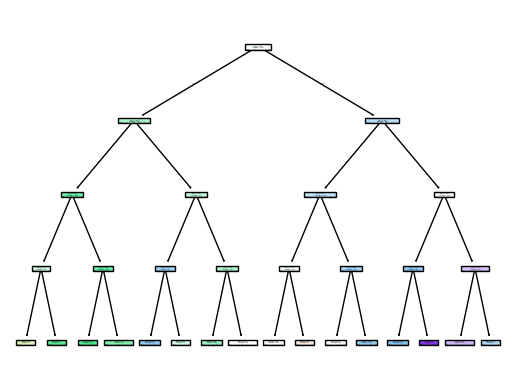

Misclassification samples: 174
530     False
1424    False
903      True
1382     True
587     False
        ...  
675     False
1510     True
1002     True
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.565


In [10]:
from sklearn import tree
feature_names = ['Col1', 'Col5', 'Col7', 'Col11']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()
y_pred = tree_model.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

## Conversión de Jupyter Notebook en un archivo Python

In [11]:
! python .convert_notebook_to_script.py --input answer3.ipynb --output answer3.py

[NbConvertApp] Converting notebook answer3.ipynb to script
[NbConvertApp] Writing 3541 bytes to answer3.py
